# **TUGAS BESAR METODE NUMERIK SEMESTER ANTARA 2024**

Anggota:

1. Reyno Benedict - 235150207111048
2. Aulia Kartika Putri - 235150207111033
3. Gaung Taqwa Indraswara - 235150207111043
4. M. Wahyu Lillah - 235150207111050

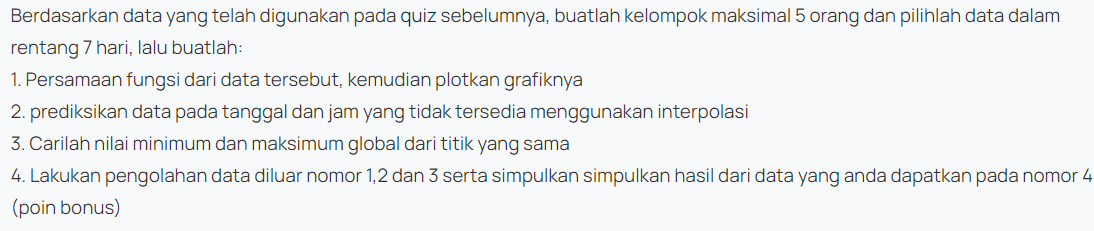

In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import *
from scipy.integrate import simps
from datetime import datetime, timedelta

ModuleNotFoundError: No module named 'pandas'

# **Dataset**

Dataset memiliki tiga kolom :  
- `noted_date` : datetime saat suhu dicatat
- `temp` : suhu yang tercatat
- `out/in` : tempat apakah suhu dicatat di dalam ataupun di luar ruangan

In [ ]:
url = "https://raw.githubusercontent.com/arawsardni/Quiz-2-Metnum/main/IOT-temp.csv"

df = pd.read_csv(url)

df.info()

print("\n\nhead dataset raw :")

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7371 entries, 0 to 7370
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   noted_date  7371 non-null   object
 1   temp        7371 non-null   int64 
 2   out/in      7371 non-null   object
dtypes: int64(1), object(2)
memory usage: 172.9+ KB


head dataset raw :


,noted_date,temp,out/in
0,30-11-2018 23:58,37,Out
1,30-11-2018 23:56,36,Out
2,30-11-2018 23:33,37,Out
3,30-11-2018 23:31,37,Out
4,30-11-2018 23:19,37,Out


In [ ]:
df.describe()

,temp
count,7371.000000
mean,39.151133
std,4.621724
min,25.000000
25%,37.000000
50%,39.000000
75%,43.000000
max,49.000000


# **Pre-processing**

In [ ]:
# Mengubah kolom noted_date menjadi datetime yang awalnya merupakan object
df['noted_date'] = pd.to_datetime(df['noted_date'], format="mixed", dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7371 entries, 0 to 7370
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   noted_date  7371 non-null   datetime64[ns]
 1   temp        7371 non-null   int64         
 2   out/in      7371 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 172.9+ KB


Kami memilih data 7 hari terakhir dari dataset yang di berikan (Tanggal 24-30 November 2018)

In [ ]:
# Memfilter data dengan mengambil data 7 hari sebelum hari terakhir
end_date = df['noted_date'].max()
start_date = end_date - timedelta(days=7)
data_seminggu = df[(df['noted_date'] > start_date) & (df['noted_date'] <= end_date)]

In [ ]:
# Memisahkan data menjadi df_in dan df_out
df_in = data_seminggu[data_seminggu['out/in'] == 'In']
df_out = data_seminggu[data_seminggu['out/in'] == 'Out']

In [ ]:
df_in.head()

,noted_date,temp,out/in
1044,2018-11-28 04:14:00,25,In
1046,2018-11-28 04:12:00,25,In
1050,2018-11-28 04:05:00,25,In
1052,2018-11-28 04:03:00,26,In
1063,2018-11-28 03:33:00,26,In


In [ ]:
df_out.head()

,noted_date,temp,out/in
0,2018-11-30 23:58:00,37,Out
1,2018-11-30 23:56:00,36,Out
2,2018-11-30 23:33:00,37,Out
3,2018-11-30 23:31:00,37,Out
4,2018-11-30 23:19:00,37,Out


# **1. Membuat Fungsi dan Plotting Data**

**Data Out**

In [ ]:
# Inisialisasi x dan y untuk data suhu di luar ruangan
x_out = np.array((df_out['noted_date'] - df_out['noted_date'].min()).dt.total_seconds() / 60.0)
y_out = np.array(df_out['temp'])

In [ ]:
# Mengurutkan data secara ascending berdasarkan x nya
sorted_indices_out = np.argsort(x_out)
x_out = x_out[sorted_indices_out]
y_out = y_out[sorted_indices_out]

In [ ]:
x_out = x_out.astype(int)

In [ ]:
x_out

array([    0,     2,     6, ..., 10053, 10076, 10078])

In [ ]:
y_out

array([38, 39, 38, ..., 37, 36, 37])

In [ ]:
# Persamaan Fungsi Data Out
coeffs_out = np.polyfit(x_out, y_out, 20)  # Fit derajat ke-20 polinomial (yang lumayan bisa mewakili data)
poly_out = np.poly1d(coeffs_out)

print("Persamaan fungsi:")
print(poly_out)

Persamaan fungsi:
            20             19             18             17
-9.525e-71 x  + 6.761e-66 x  - 2.017e-61 x  + 3.106e-57 x 
              16             15             14             13
 - 2.124e-53 x  - 6.861e-50 x  + 2.412e-45 x  - 1.251e-41 x 
              12             11             10             9
 - 1.167e-37 x  + 2.369e-33 x  - 1.935e-29 x  + 9.726e-26 x
              8             7             6             5             4
 - 3.236e-22 x + 7.048e-19 x - 9.055e-16 x + 3.897e-13 x + 6.457e-10 x
              3             2
 - 1.084e-06 x + 0.0005918 x - 0.09835 x + 39.28


<ipython-input-232-aa5e24acf930>:2: RankWarning: Polyfit may be poorly conditioned
  coeffs_out = np.polyfit(x_out, y_out, 20)  # Fit derajat ke-20 polinomial (yang lumayan bisa mewakili data)


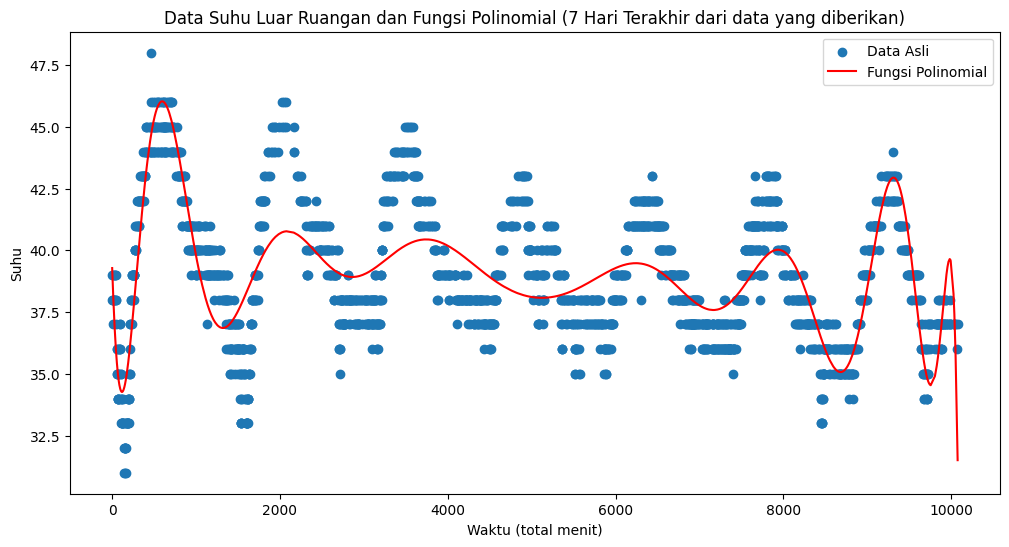

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x_out, y_out, label='Data Asli')
plt.plot(x_out, poly_out(x_out), color='red', label='Fungsi Polinomial')
plt.xlabel('Waktu (total menit)')
plt.ylabel('Suhu')
plt.title('Data Suhu Luar Ruangan dan Fungsi Polinomial (7 Hari Terakhir dari data yang diberikan)')
plt.legend()
plt.show()

**Data In**

In [ ]:
# Inisialisaasi x dan y untuk data di dalam ruangan
x_in = np.array((df_in['noted_date'] - df_in['noted_date'].min()).dt.total_seconds() / 60.0)
y_in = np.array(df_in['temp'])

In [ ]:
sorted_indices = np.argsort(x_in)
x_in = x_in[sorted_indices]
y_in_ = y_in[sorted_indices]

In [ ]:
x_in = x_in.astype(int)

In [ ]:
x_in

array([  0,   2,  10,  13,  17,  20,  27,  30,  34,  47,  48,  56,  59,
        67,  69,  71,  73,  79,  83,  85,  87,  99, 107, 111, 113, 127,
       135, 145, 155, 159, 169, 171, 243, 245, 261, 263, 265, 375, 403,
       411, 433, 435, 527, 545, 616, 618, 652, 672, 682, 696, 698, 700,
       706, 710, 720, 722, 796, 806, 809, 814, 816, 827, 836, 845, 856,
       860, 864, 869, 874, 878, 881, 886, 889, 919, 921, 928, 930])

In [ ]:
y_in

array([25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 28, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 28,
       28, 28, 28, 28, 28, 27, 27, 27, 28, 28, 28, 28, 27, 28, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 26, 26, 25])

In [ ]:
# Persamaan Fungsi Data In
coeffs_in = np.polyfit(x_in, y_in, 3)  # Fit derajat ke-3 polinomial (sudah lumayan mewakili persebaran data)
poly_in = np.poly1d(coeffs_in)

print("Persamaan fungsi:")
print(poly_in)

Persamaan fungsi:
           3             2
2.698e-08 x - 5.621e-05 x + 0.02982 x + 25.76


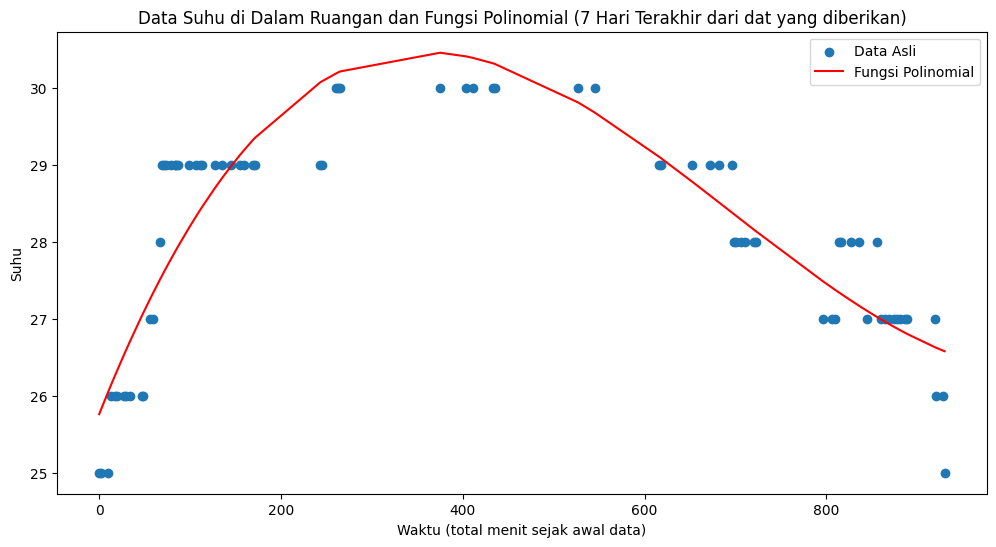

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x_in, y_in, label='Data Asli')
plt.plot(x_in, poly_in(x_in), color='red', label='Fungsi Polinomial')
plt.xlabel('Waktu (total menit sejak awal data)')
plt.ylabel('Suhu')
plt.title('Data Suhu di Dalam Ruangan dan Fungsi Polinomial (7 Hari Terakhir dari dat yang diberikan)')
plt.legend()
plt.show()

# **PREDIKSI DATA MENGGUNAKAN INTERPOLASI**

Untuk memprediksi suhu pada tanggal yang tidak ada menggunakan interpolasi agak sulit, karena interpolasi lebih akurat untuk prediksi yang ada di dalam rentang data, jadi di sini saya akan memprediksi suhu di jam atau menit yang tidak ada dalam data namun masih dalam rentang 7 hari terakhir

**Data Out**

Misal saya akan memprediksi suhu di luar ruangan pada tanggal random yaitu 25 November 2018 jam 3 sore menggunakan interpolasi dari library scipy

In [ ]:
# Tanggal target
target_date = pd.Timestamp('2018-11-25 15:00:00')

# Tanggal minimum (referensi)
min_date = pd.Timestamp('2018-11-24 00:00:00')

# Hitung selisih waktu dalam menit
time_difference_minutes = (target_date - min_date).total_seconds() / 60.0

print(f"Waktu dalam menit relatif terhadap 24 November 2018 jam 00:00 : {time_difference_minutes:.0f}")

Waktu dalam menit relatif terhadap 24 November 2018 jam 00:00 : 2340


In [ ]:
# Prediksi dari fungsi yang dibuat sebelumnya
y_pred = np.polyval(poly_out, time_difference_minutes)
print("Prediksi suhu pada tanggal 25 November 2018 jam 3 sore :", {y_pred})

Prediksi suhu pada tanggal 25 November 2018 jam 3 sore : {40.25074958615418}


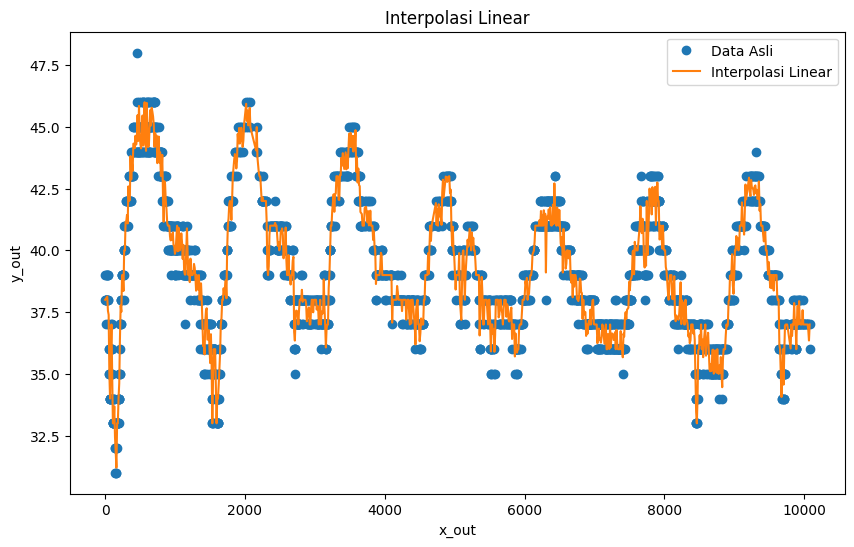

In [ ]:
# Membuat fungsi interpolasi
f_out = interp1d(x_out, y_out, kind='linear', fill_value="extrapolate")

# Menggunakan fungsi interpolasi
x_new = np.linspace(min(x_out), max(x_out), num=1000)
y_new = f_out(x_new)

# Plot hasil interpolasi
plt.figure(figsize=(10, 6))
plt.plot(x_out, y_out, 'o', label='Data Asli')
plt.plot(x_new, y_new, '-', label='Interpolasi Linear')
plt.xlabel('x_out')
plt.ylabel('y_out')
plt.legend()
plt.title('Interpolasi Linear')
plt.show()

In [ ]:
# Prediksi menggunakan interpolasi
f_out(2340)

array(39.25)

**Data In**

Unutk data suhu di dalam ruangan dari data di minggu ini, data yang terekam dimulai dari tanggal 27 jam 12:44 hingga tanggal 28 jam 04:14

In [ ]:
df_in.max()

noted_date    2018-11-28 04:14:00
temp                           30
out/in                         In
dtype: object

In [ ]:
df_in.min()

noted_date    2018-11-27 12:44:00
temp                           25
out/in                         In
dtype: object

Jadi saya coba prediksi untuk tanggal 27 jam 3 sore juga

In [ ]:
# Tanggal target
target_date = pd.Timestamp('2018-11-27 15:00:00')

# Tanggal minimum (referensi)
min_date = pd.Timestamp('2018-11-27 12:44:00')

# Hitung selisih waktu dalam menit
time_difference_minutes = (target_date - min_date).total_seconds() / 60.0

print(f"Waktu dalam menit relatif terhadap 27 November 2018 jam 12:44: {time_difference_minutes:.0f}")

Waktu dalam menit relatif terhadap 27 November 2018 jam 12:44: 136


In [ ]:
# Prediksi dari fungsi yang dibuat sebelumnya
y_pred = np.polyval(poly_in, time_difference_minutes)
print("Prediksi suhu pada tanggal 27 November 2018:", {y_pred})

Prediksi suhu pada tanggal 27 November 2018: {28.845574829066774}


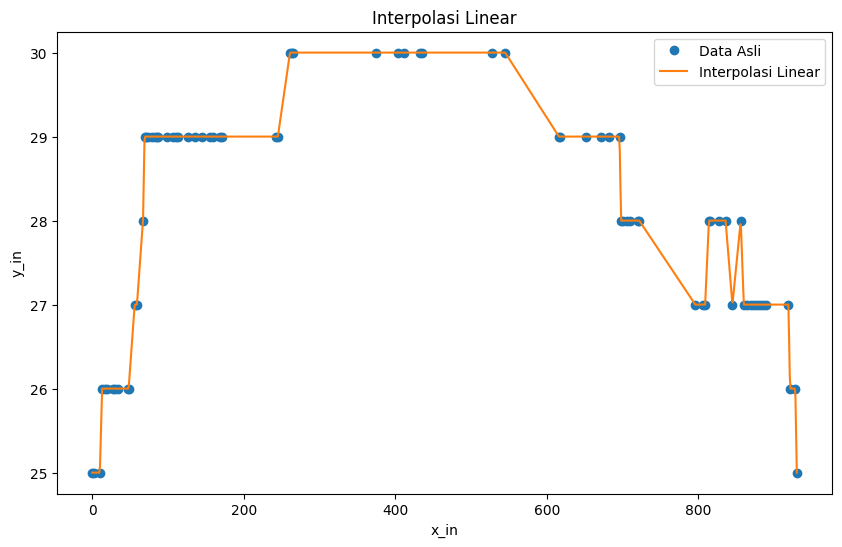

In [ ]:
# Membuat fungsi interpolasi
f_in = interp1d(x_in, y_in, kind='linear', fill_value="extrapolate")

# Menggunakan fungsi interpolasi
x_new = np.linspace(min(x_in), max(x_in), num=1000)
y_new = f_in(x_new)

# Plot hasil interpolasi
plt.figure(figsize=(10, 6))
plt.plot(x_in, y_in, 'o', label='Data Asli')
plt.plot(x_new, y_new, '-', label='Interpolasi Linear')
plt.xlabel('x_in')
plt.ylabel('y_in')
plt.legend()
plt.title('Interpolasi Linear')
plt.show()

In [ ]:
f_in(136)

array(29.)

# **Minimum dan Maksimum Global**

**Menggunakan Metode Newton**

In [ ]:
def newton_raphson_optimization(func, initial_x, max_iter=10):
    x = sp.Symbol('x')

    turunan_pertama = sp.diff(func, x)
    turunan_kedua = sp.diff(turunan_pertama, x)

    x_previous = initial_x
    x_list = [x_previous]
    fx_list = [func.subs(x, x_previous)]

    for _ in range(max_iter):
        turunan_pertama_value = turunan_pertama.subs(x, x_previous)
        turunan_kedua_value = turunan_kedua.subs(x, x_previous)

        if turunan_kedua_value == 0:
            break

        x_next = x_previous - turunan_pertama_value / turunan_kedua_value
        fx = func.subs(x, x_next)

        x_list.append(x_next)
        fx_list.append(fx)

        x_previous = x_next

    df = pd.DataFrame({'x': x_list, 'f(x)': fx_list})
    return df

**Data Out**

In [ ]:
x = sp.symbols('x')

# Merubah dari numpy polynomial ke sympy polynomial agar bisa dicari diff nya

# Urutan coefficient di numpy terbalik (dari pangkat terbesar ke pangkat 0) harus dibalik untuk dinyatkan dalam sympy
coeffs_sympy = list(reversed(coeffs_out))
poly_out_sympy = sum(c * x**i for i, c in enumerate(coeffs_sympy))

# Membuat turunan
turunan_pertama = sp.diff(poly_out_sympy, x)

turunan_kedua = sp.diff(turunan_pertama, x)

print("Persamaan fungsi out awal :")
print(poly_out_sympy)
print("\nTurunan fungsi out pertama :")
print(turunan_pertama)
print("\nTurunan fungsi out kedua :")
print(turunan_kedua)

Persamaan fungsi out awal :
-9.52490594144045e-71*x**20 + 6.76054949226304e-66*x**19 - 2.01656674461393e-61*x**18 + 3.10640899679901e-57*x**17 - 2.12370100318914e-53*x**16 - 6.86149954022669e-50*x**15 + 2.41241011871509e-45*x**14 - 1.25133427714055e-41*x**13 - 1.1668235821493e-37*x**12 + 2.3693932049631e-33*x**11 - 1.93522884847252e-29*x**10 + 9.72562737192006e-26*x**9 - 3.2364961984908e-22*x**8 + 7.04836324493642e-19*x**7 - 9.05460209980921e-16*x**6 + 3.89740751386731e-13*x**5 + 6.45719319466859e-10*x**4 - 1.08430506485484e-6*x**3 + 0.000591810528211632*x**2 - 0.0983455902127553*x + 39.2831427325454

Turunan fungsi out pertama :
-1.90498118828809e-69*x**19 + 1.28450440352998e-64*x**18 - 3.62982014030508e-60*x**17 + 5.28089529455832e-56*x**16 - 3.39792160510262e-52*x**15 - 1.029224931034e-48*x**14 + 3.37737416620113e-44*x**13 - 1.62673456028271e-40*x**12 - 1.40018829857916e-36*x**11 + 2.60633252545941e-32*x**10 - 1.93522884847252e-28*x**9 + 8.75306463472805e-25*x**8 - 2.58919695879264e

In [ ]:
newton_raphson_optimization(poly_out_sympy, 2340)

,x,f(x)
0,2340,40.2507495860409
1,1730.54749807717,39.3362442550067
2,2358.36144808933,40.1852484281395
3,1559.75193577626,37.9786562878754
4,898.895341101038,41.7383396076787
5,3622.82841532568,40.3832757086057
6,3746.51249669946,40.4432156259863
7,3742.77355912929,40.4432738026298
8,3742.77585927982,40.4432738078722
9,3742.77585830902,40.4432737999014


Dengan menggunakan data x0 = 2340 yang di dapatkan adalah nilai maksimum lokal yaitu sekitar 40 derajat

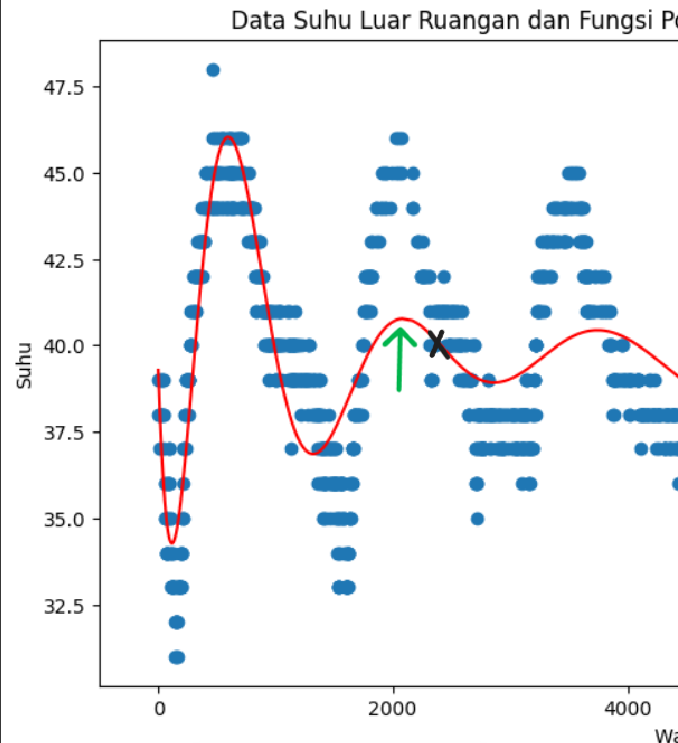

Ini adalah nilai Maksimum Global dan Minimum Global dari data asli

In [ ]:
y_out.max()

48

In [ ]:
y_out.min()

31

Jika ingin mendapatkan maskimum global dari fungsi ini maka harus digunakan nilai x yang dekat dengan x milik y maksimum global (dalam fungsi ini sekitar x = 500 sampai x = 700)

In [ ]:
newton_raphson_optimization(poly_out_sympy, 700)

,x,f(x)
0,700,45.3378627444317
1,565.872377356329,45.9659499580870
2,594.782394198881,46.0314787674434
3,595.757076917609,46.0315470197146
4,595.758372331994,46.0315470198347
5,595.758372334294,46.0315470198347
6,595.758372334297,46.0315470198348
7,595.758372334294,46.0315470198347
8,595.758372334297,46.0315470198348
9,595.758372334294,46.0315470198347


untuk minimum global bisa gunakan nilai x sekitar 0 sampai 200

In [ ]:
newton_raphson_optimization(poly_out_sympy, 200)

,x,f(x)
0,200,35.7201650212747
1,60.7649717820214,35.2581662780525
2,106.997067682206,34.2963552732449
3,116.595540723634,34.2688316575590
4,116.992530813383,34.2687891889724
5,116.993195507935,34.2687891888539
6,116.993195509796,34.2687891888538
7,116.993195509796,34.2687891888538
8,116.993195509796,34.2687891888538
9,116.993195509796,34.2687891888538


**Data In**

In [ ]:
coeffs_sympy = list(reversed(coeffs_in))
poly_in_sympy = sum(c * x**i for i, c in enumerate(coeffs_sympy))

turunan_pertama = sp.diff(poly_in_sympy, x)

turunan_kedua = sp.diff(turunan_pertama, x)

print("Persamaan fungsi in awal:")
print(poly_in_sympy)
print("\nTurunan fungsi in pertama:")
print(turunan_pertama)
print("\nTurunan fungsi in kedua:\n")
print(turunan_kedua)

Persamaan fungsi in awal:
2.69787675214814e-8*x**3 - 5.62123338701655e-5*x**2 + 0.0298238945898979*x + 25.7613645894687

Turunan fungsi in pertama:
8.09363025644443e-8*x**2 - 0.000112424667740331*x + 0.0298238945898979

Turunan fungsi in kedua:

1.61872605128889e-7*x - 0.000112424667740331


In [ ]:
newton_raphson_optimization(poly_in_sympy, 136)

,x,f(x)
0,136,28.8455748290668
1,313.315991506923,30.4172695891309
2,354.554407824572,30.4716316299934
3,357.055512379538,30.4718041791630
4,357.064780644011,30.4718041815093
5,357.064780771286,30.4718041815093
6,357.064780771286,30.4718041815093
7,357.064780771286,30.4718041815093
8,357.064780771286,30.4718041815093
9,357.064780771286,30.4718041815093


In [ ]:
y_in.max()

30

untuk fungsi ini langsung menemukan nilai maksimum global karena kurva berbentuk parabola yang hanya memiliki nilai optimal maksimum

# **4. Pengolahan Data Lain**

## **Diffrensiasi untuk mencari laju perubahan suhu**

In [ ]:
# Metode beda tengah
def central_diff(x, y):
    dydx = np.zeros(y.shape)
    dydx[1:-1] = (y[2:] - y[:-2]) / (x[2:] - x[:-2])
    dydx[0] = (y[1] - y[0]) / (x[1] - x[0])
    dydx[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])
    return dydx

**Data In**

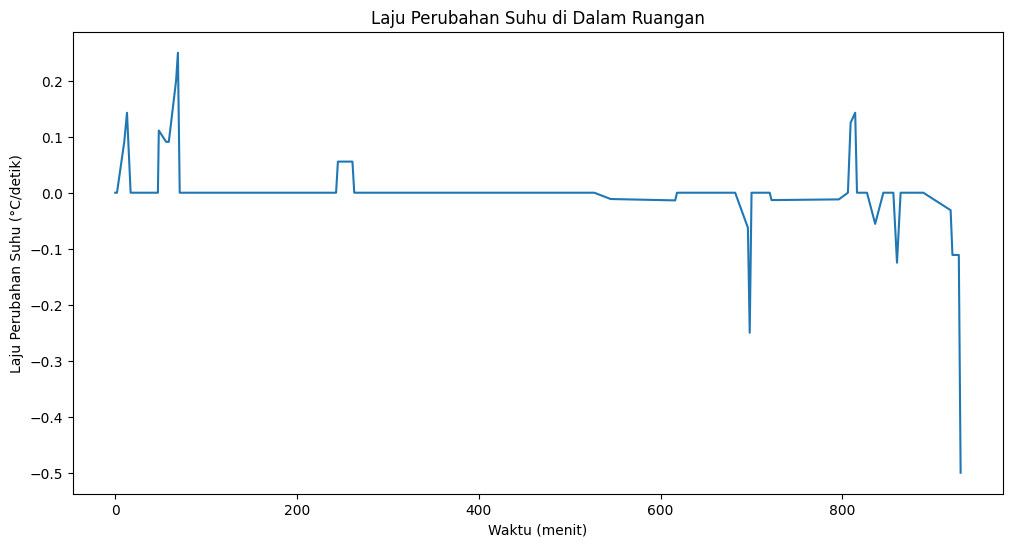

In [ ]:
temp_change_rate = central_diff(x_in, y_in)
plt.figure(figsize=(12, 6))
plt.plot(x_in, temp_change_rate)
plt.title('Laju Perubahan Suhu di Dalam Ruangan')
plt.xlabel('Waktu (menit)')
plt.ylabel('Laju Perubahan Suhu (°C/detik)')
plt.show()

**Data Out**

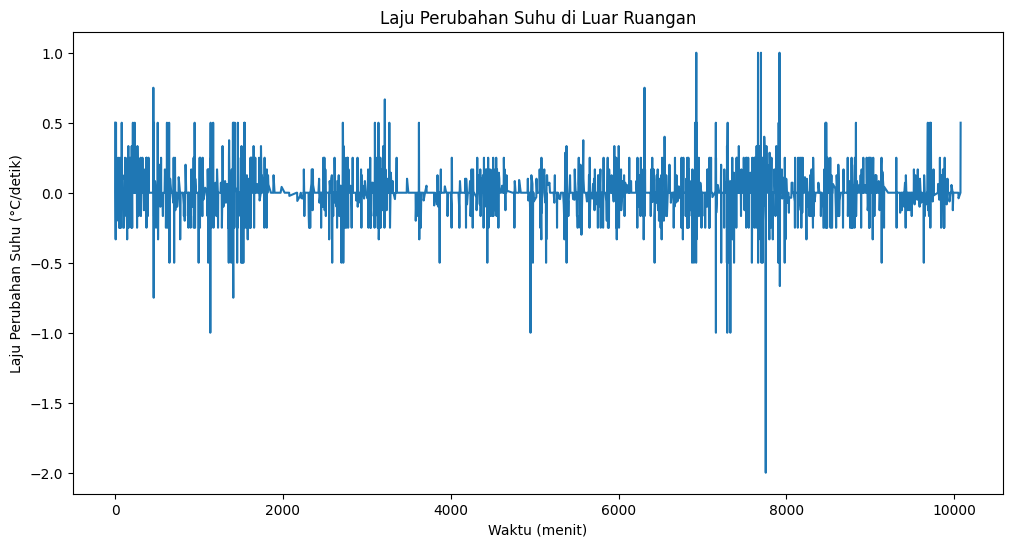

In [ ]:
temp_change_rate = central_diff(x_out, y_out)
plt.figure(figsize=(12, 6))
plt.plot(x_out, temp_change_rate)
plt.title('Laju Perubahan Suhu di Luar Ruangan')
plt.xlabel('Waktu (menit)')
plt.ylabel('Laju Perubahan Suhu (°C/detik)')
plt.show()

## **Integral untuk mencari total panas yang direkam dalam seminggu**

In [ ]:
# Metode Trapesium
def trapezoidal_integration(x, y):
    if len(x) != len(y):
        raise ValueError("Panjang array x dan y harus sama")

    n = len(x)
    integral = 0.0

    for i in range(1, n):
        dx = x[i] - x[i-1]
        integral += 0.5 * (y[i] + y[i-1]) * dx

    return integral

# Metode Simpson
def simpson_integration(x, y):
    n = len(x)
    if n % 2 == 0:
        raise ValueError("Jumlah titik data harus ganjil untuk metode Simpson")

    total = y[0] + y[-1]

    for i in range(1, n-1, 2):
        total += 4 * y[i]

    for i in range(2, n-2, 2):
        total += 2 * y[i]

    h = (x[-1] - x[0]) / (n - 1)
    return total * h / 3

def calculate_total_heat(x, y, method='simpson'):
    if method == 'simpson':
        return simpson_integration(x, y)
    elif method == 'trapezoidal':
        return trapezoidal_integration(x, y)
    else:
        raise ValueError("Metode harus 'simpson' atau 'trapezoidal'")

def plot_temperature(x, y):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', label='Suhu')
    plt.title('Grafik Suhu terhadap Waktu')
    plt.xlabel('Waktu (Menit)')
    plt.ylabel('Suhu (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Data In**

Total panas (Trapezoidal): 26724.50 °C·menit
Total panas (Simpson): 26072.63 °C·menit


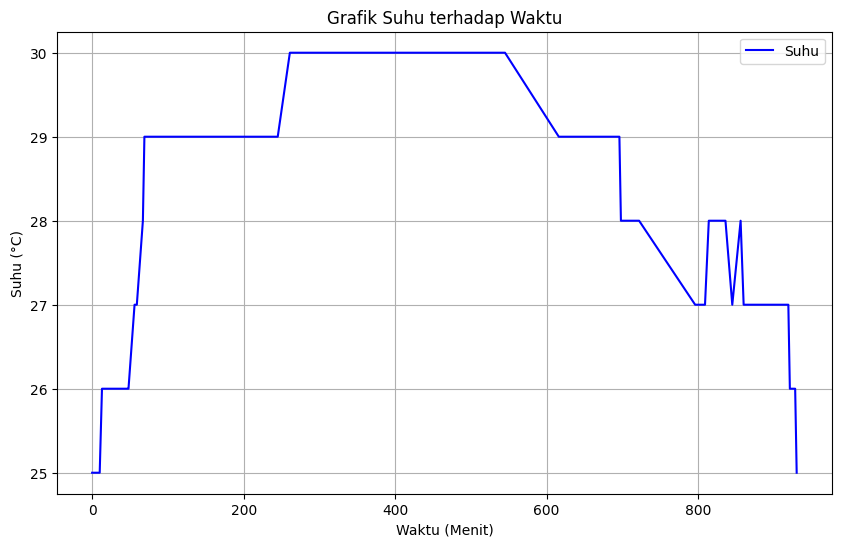

In [ ]:
total_heat_trapezoidal = calculate_total_heat(x_in, y_in, method='trapezoidal')
print(f"Total panas (Trapezoidal): {total_heat_trapezoidal:.2f} °C·menit")

total_heat_simpson = calculate_total_heat(x_in, y_in, method='simpson')
print(f"Total panas (Simpson): {total_heat_simpson:.2f} °C·menit")

plot_temperature(x_in, y_in)

**Data Out**

Total panas (Trapezoidal): 396722.00 °C·menit
Total panas (Simpson): 392625.54 °C·menit


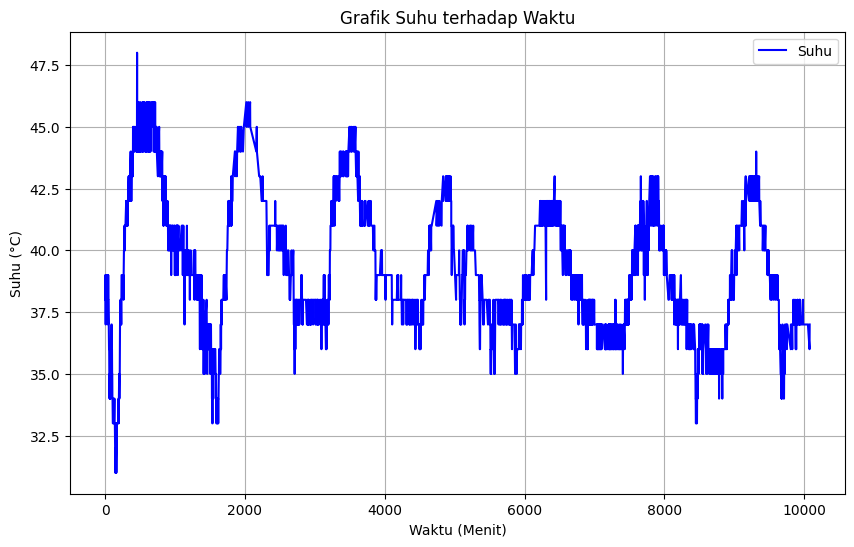

In [ ]:
total_heat_trapezoidal = calculate_total_heat(x_out, y_out, method='trapezoidal')
print(f"Total panas (Trapezoidal): {total_heat_trapezoidal:.2f} °C·menit")

total_heat_simpson = calculate_total_heat(x_out, y_out, method='simpson')
print(f"Total panas (Simpson): {total_heat_simpson:.2f} °C·menit")

plot_temperature(x_out, y_out)

**Menggunakan Library**

In [ ]:
# In
total_heat = simps(y_in, x_in)
print(f"Total panas selama satu minggu: {total_heat:.2f} °C·menit")

Total panas selama satu minggu: 26826.64 °C·menit


In [ ]:
# Out
total_heat = simps(y_out, x_out)
print(f"Total panas selama satu minggu: {total_heat:.2f} °C·menit")

Total panas selama satu minggu: 396714.52 °C·menit


# ***Trials & Errors* Selama Pengerjaan**

Beberapa percobaan untuk mengolah data secara manual tanpa menggunakan library

In [ ]:
def _poly_newton_coefficient(x, y):
    """
    x: list or np array containing x data points
    y: list or np array containing y data points
    """
    m = len(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1]) / (x[k:m] - x[k - 1])
    return a

In [ ]:
def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(a) - 1
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k]) * p
    return p

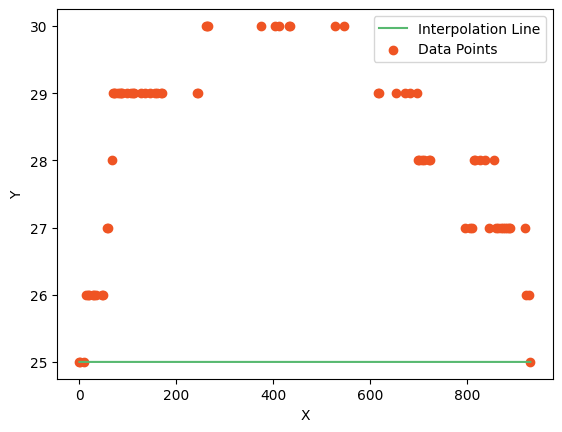

In [ ]:
x_min = min(x_in) * 100
x_max = max(x_in) * 100
x_pred_array = [x / 100.0 for x in range(x_min, x_max + 1)]

y_pred_array = [newton_polynomial(x_in, y_in, x) for x in x_pred_array]

plt.plot(x_pred_array, y_pred_array, color='#58b970', label='Interpolation Line')
plt.scatter(x_in, y_in, c='#ef5423', label='Data Points')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


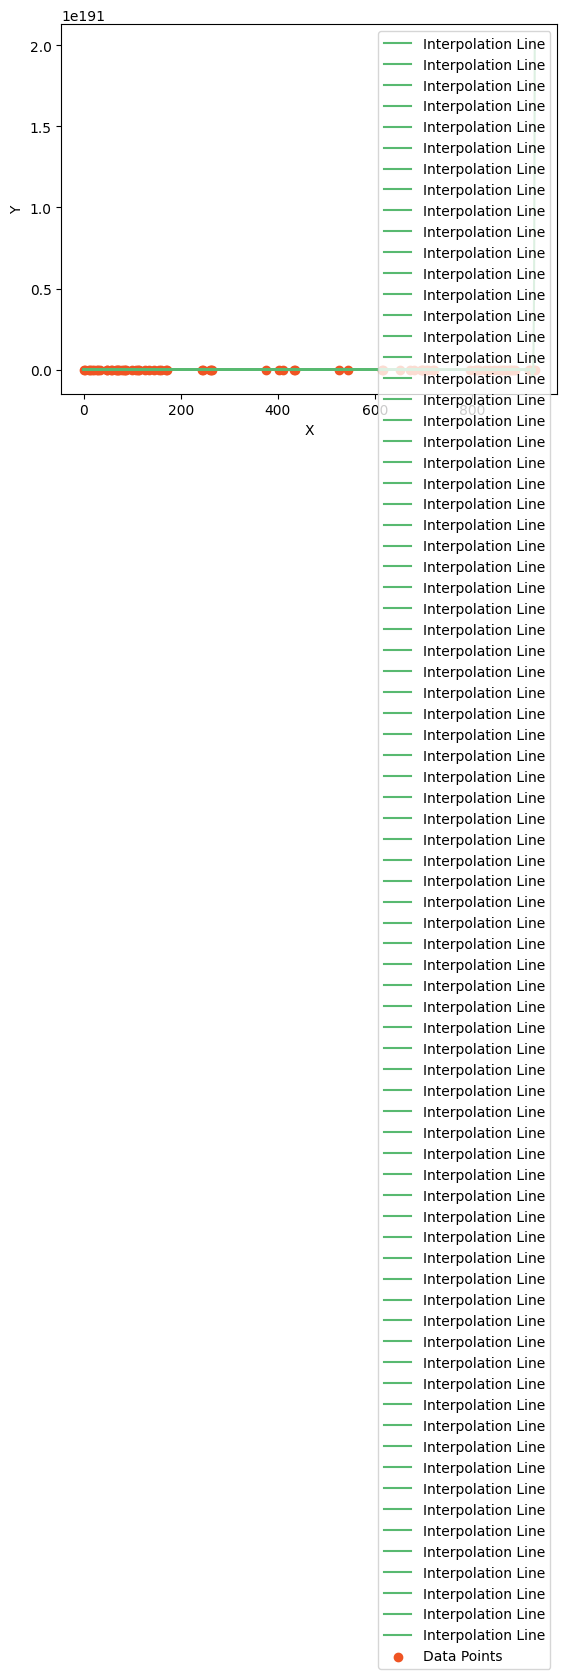

In [ ]:
coef = divided_diff(x_in, y_in)

x_min = min(x_in) * 100
x_max = max(x_in) * 100
x_pred_array = [x / 100.0 for x in range(x_min, x_max + 1)]
y_pred_array = [newton_poly(coef, x_in, x) for x in x_pred_array]

# Plotting
plt.plot(x_pred_array, y_pred_array, color='#58b970', label='Interpolation Line')
plt.scatter(x_in, y_in, c='#ef5423', label='Data Points')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()